Importing all the required packages

In [5]:
import pandas 
import scipy.signal as scipy
from matplotlib import pyplot as plt
from datetime import datetime
from colorama import Fore
import seaborn as sns
import numpy as np
import statistics

Setting default value for paramters.

In [6]:
CSV_YEAR_COLUMN =   0
CSV_MONTH_COLUMN =  1
CSV_DATA_COLUMN =   3

Reading data from `csv` file

In [8]:
data = pandas.read_csv("sunspots.csv", sep=";", header=None)


,0,1,2,3,4,5,6
0,1749,1,1749.042,96.7,-1.0,-1,1
1,1749,2,1749.123,104.3,-1.0,-1,1
2,1749,3,1749.204,116.7,-1.0,-1,1
3,1749,4,1749.288,92.8,-1.0,-1,1
4,1749,5,1749.371,141.7,-1.0,-1,1
...,...,...,...,...,...,...,...
3275,2021,12,2021.958,67.5,15.6,845,1
3276,2022,1,2022.042,54.0,12.9,1007,0
3277,2022,2,2022.122,59.7,13.1,1044,0
3278,2022,3,2022.204,78.5,13.9,1277,0


Printing histogram

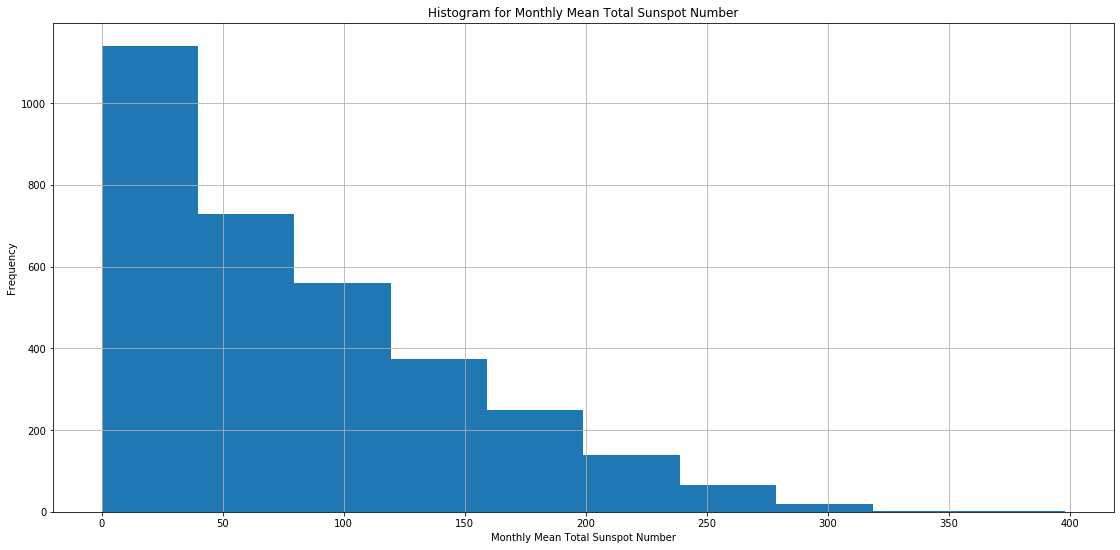

In [6]:
plt.figure(figsize=(19,9))
plt.ylabel("Frequency")
plt.title("Histogram for Monthly Mean Total Sunspot Number")
plt.xlabel("Monthly Mean Total Sunspot Number")
data[CSV_DATA_COLUMN].hist()

Printing plot

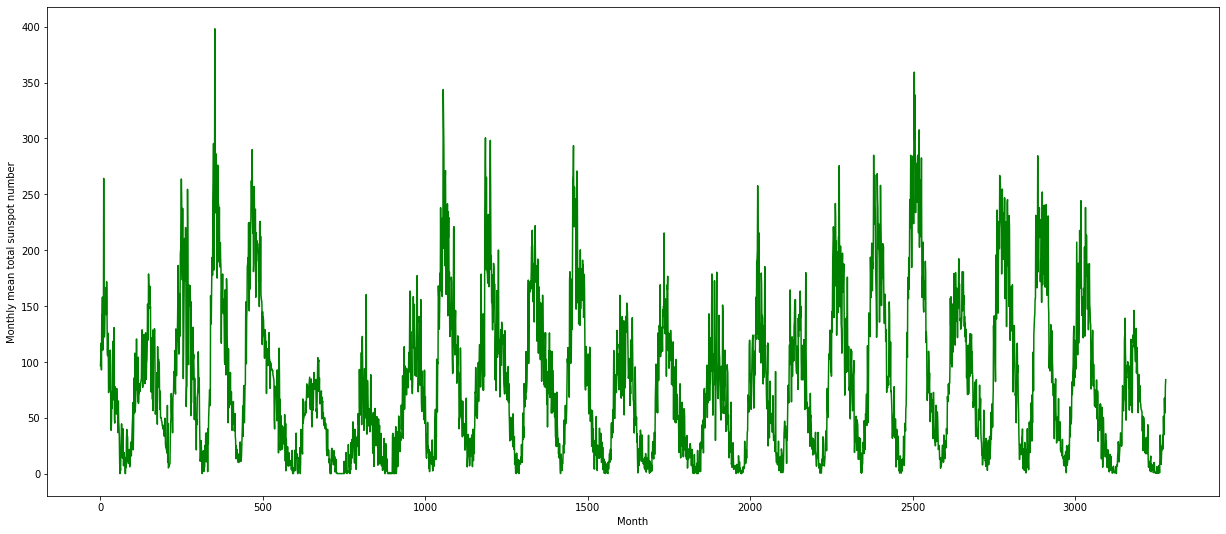

In [7]:
plt.figure(figsize=(21,9))
plt.ylabel("Monthly mean total sunspot number")
plt.xlabel("Month")
plt.plot(data[CSV_DATA_COLUMN], c="green")

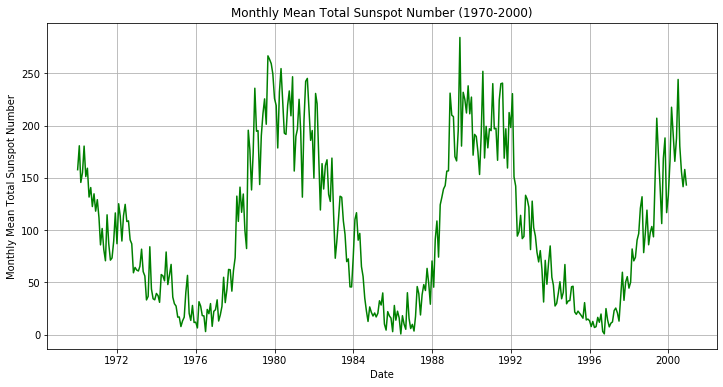

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the data from the CSV file with a semicolon separator and no header
data = pd.read_csv("sunspots.csv", sep=";", header=None)

# Assign column names to the DataFrame
data.columns = ['Year', 'Month', 'Fractional Year', 'Monthly Mean Sunspot Number', 'Other1', 'Other2', 'Other3']

# Create a DateTime index from the Year and Month columns
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# Set the Date column as the index
data.set_index('Date', inplace=True)

# Filter data for a specific range of years, e.g., 1980 to 1990
start_date = '1970-01-01'
end_date = '2000-12-31'
filtered_data = data[start_date:end_date]

# Plotting the filtered data
plt.figure(figsize=(12, 6))
plt.plot(filtered_data.index, filtered_data['Monthly Mean Sunspot Number'], color="green")
plt.title("Monthly Mean Total Sunspot Number (1970-2000)")
plt.ylabel("Monthly Mean Total Sunspot Number")
plt.xlabel("Date")
plt.grid(True)
plt.show()


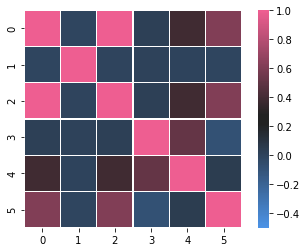

In [8]:
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60, center='dark', as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5 , cmap=cmap, square=True, linewidths=.2)

finding minimum peaks

finding maximum peaks

period = ~11 yrs = ~132 months

In [9]:
periodFirst = data[CSV_DATA_COLUMN][76:209]
periodSecond = data[CSV_DATA_COLUMN][209:313]
periodThird = data[CSV_DATA_COLUMN][313:424]
periodFourth = data[CSV_DATA_COLUMN][424:594]
periodFifth = data[CSV_DATA_COLUMN][593:707]

Describing all periods

In [10]:
pandas.DataFrame.describe(periodFirst)

count    133.000000
mean      70.796241
std       41.562821
min        0.000000
25%       40.000000
50%       67.000000
75%      100.300000
max      178.700000
Name: 3, dtype: float64

In [11]:
pandas.DataFrame.describe(periodSecond)

count    104.000000
mean     102.329808
std       63.607180
min        5.000000
25%       54.050000
50%       91.100000
75%      150.250000
max      263.700000
Name: 3, dtype: float64

In [12]:
pandas.DataFrame.describe(periodThird)

count    111.000000
mean     111.154955
std       87.516840
min        0.000000
25%       37.300000
50%       88.300000
75%      178.100000
max      398.200000
Name: 3, dtype: float64

In [13]:
pandas.DataFrame.describe(periodFourth)

count    170.000000
mean      99.337647
std       75.818168
min        0.000000
25%       30.775000
50%       87.750000
75%      154.700000
max      290.000000
Name: 3, dtype: float64

In [14]:
pandas.DataFrame.describe(periodFifth)

count    114.000000
mean      48.003509
std       29.014671
min        0.000000
25%       20.000000
50%       50.000000
75%       72.925000
max      103.800000
Name: 3, dtype: float64

In [15]:
pandas.DataFrame.describe(data[CSV_DATA_COLUMN])

count    3280.000000
mean       81.594329
std        67.805438
min         0.000000
25%        23.900000
50%        66.850000
75%       122.400000
max       398.200000
Name: 3, dtype: float64

Printing variance

In [16]:
output = statistics.variance(periodFirst)
print("Variance for 1st period: ", output)

output = statistics.variance(periodSecond)
print("Variance for 2nd period: ", output)

output = statistics.variance(periodThird)
print("Variance for 3rd period: ", output)

output = statistics.variance(periodFourth)
print("Variance for 4th period: ", output)

output = statistics.variance(periodFifth)
print("Variance for 5th period: ", output)

output = statistics.variance(data[CSV_DATA_COLUMN])
print("Variance for all data: ", output)

Variance for 1st period:  1727.4680918204601
Variance for 2nd period:  4045.8733747199403
Variance for 3rd period:  7659.197225225225
Variance for 4th period:  5748.394550643926
Variance for 5th period:  841.8511380220463
Variance for all data:  4597.577369479838


Drawing boxplots

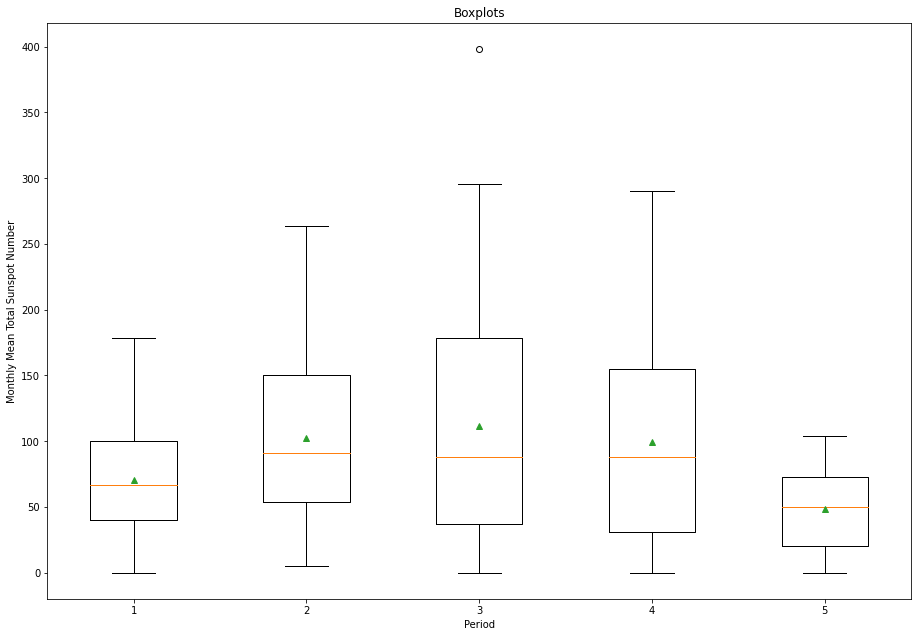

In [17]:
box_1 = periodFirst
box_2 = periodSecond
box_3 = periodThird
box_4 = periodFourth
box_5 = periodFifth

boxes = [box_1, box_2, box_3, box_4, box_5]

fig = plt.figure(figsize =(12, 8))
 
ax = fig.add_axes([0, 0, 1, 1])
plt.ylabel("Monthly Mean Total Sunspot Number")
plt.xlabel("Period")
plt.title("Boxplots")
bp = ax.boxplot(boxes, showmeans=True)
plt.show()

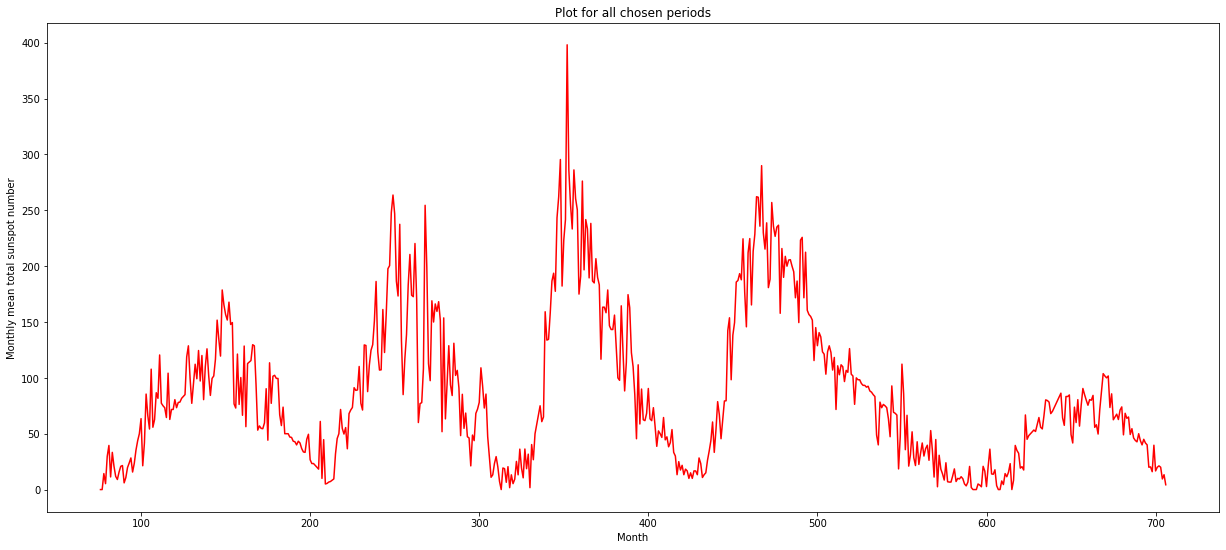

In [18]:
plt.figure(figsize=(21,9))
plt.ylabel("Monthly mean total sunspot number")
plt.xlabel("Month")
plt.title("Plot for all chosen periods")
plt.plot(data[CSV_DATA_COLUMN][76:707], c="red")

lag plot

<AxesSubplot:title={'center':'Lag plot'}, xlabel='y(t)', ylabel='y(t + 1)'>

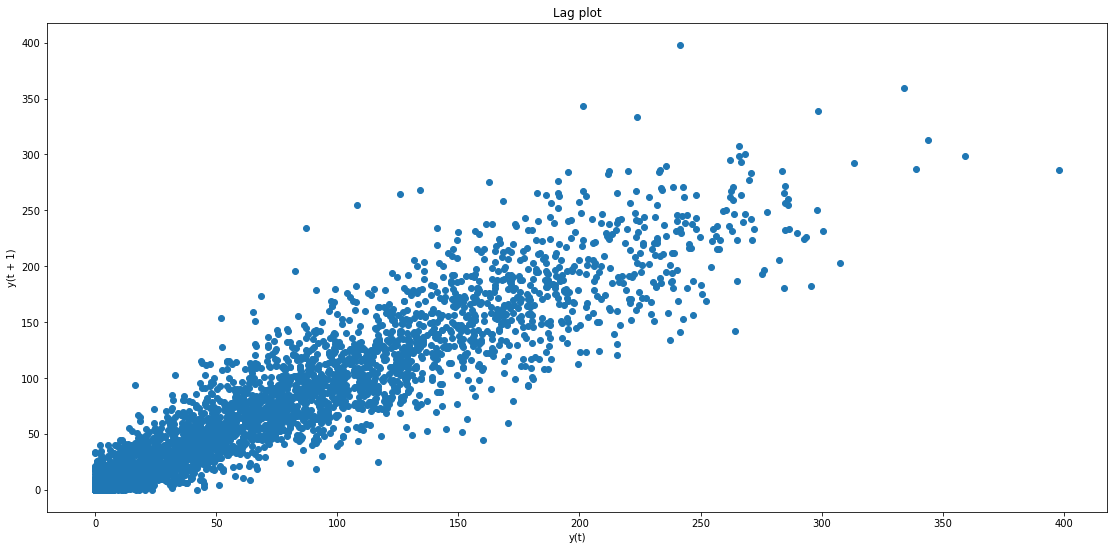

In [19]:
df = data[CSV_DATA_COLUMN]
plt.figure(figsize=(19,9))
plt.title("Lag plot")
pandas.plotting.lag_plot(df, lag=1)

Autocorrelation

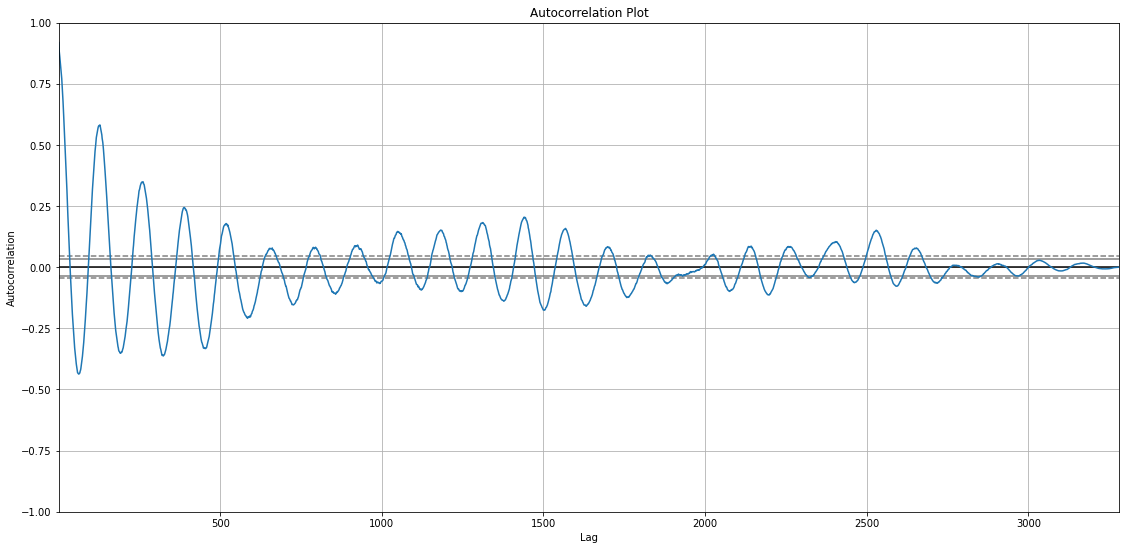

In [20]:
series = data[CSV_DATA_COLUMN]
plt.figure(figsize=(19,9))
pandas.plotting.autocorrelation_plot(series)
plt.title("Autocorrelation Plot")
plt.show()

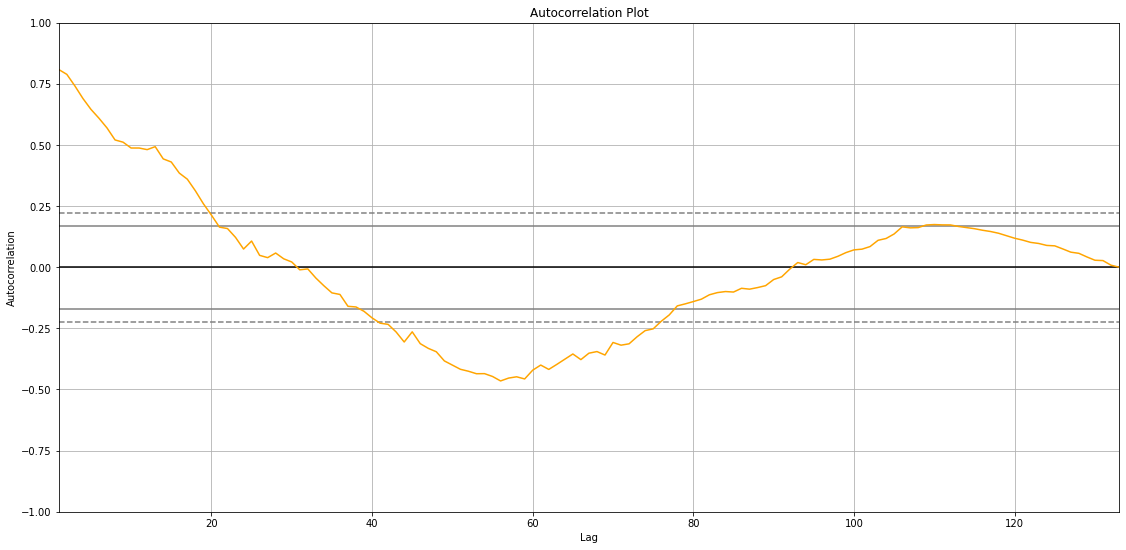

In [21]:
series = periodFirst
plt.figure(figsize=(19,9))
pandas.plotting.autocorrelation_plot(series, c="orange")
plt.title("Autocorrelation Plot")
plt.show()

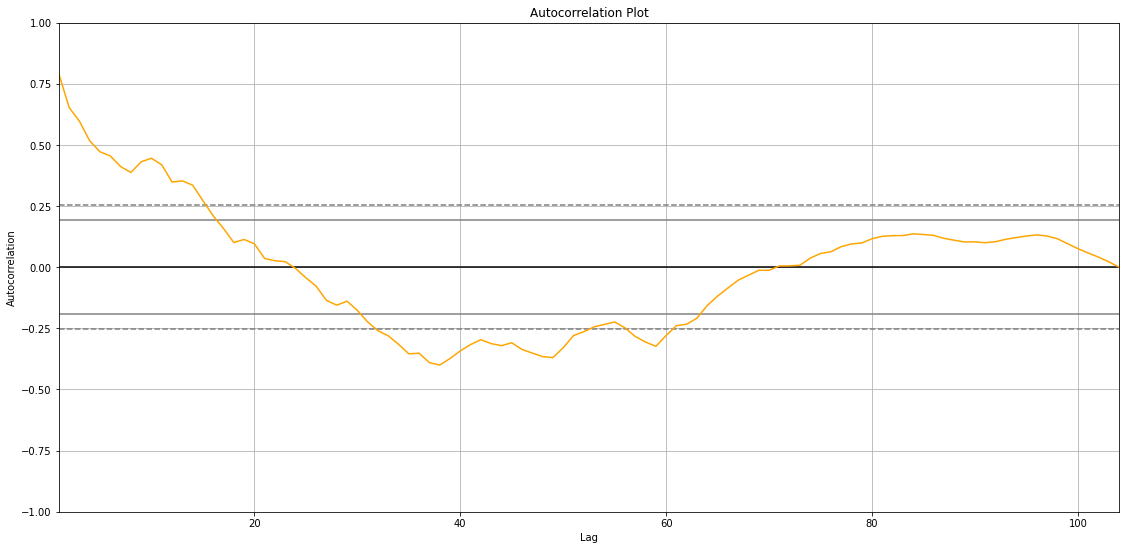

In [22]:
series = periodSecond
plt.figure(figsize=(19,9))
pandas.plotting.autocorrelation_plot(series, c="orange")
plt.title("Autocorrelation Plot")
plt.show()

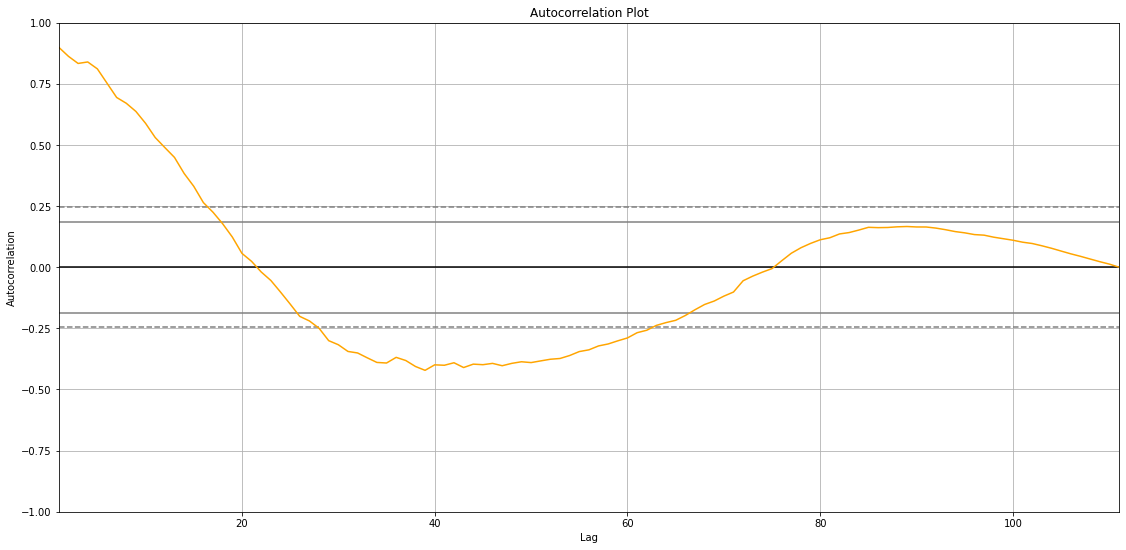

In [23]:
series = periodThird
plt.figure(figsize=(19,9))
pandas.plotting.autocorrelation_plot(series, c="orange")
plt.title("Autocorrelation Plot")
plt.show()

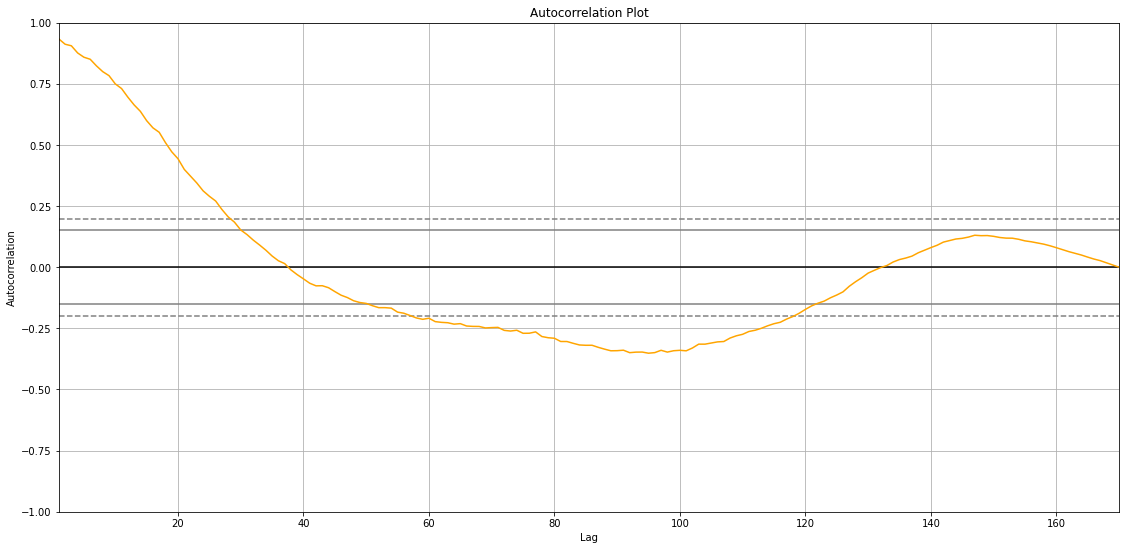

In [24]:
series = periodFourth
plt.figure(figsize=(19,9))
pandas.plotting.autocorrelation_plot(series, c="orange")
plt.title("Autocorrelation Plot")
plt.show()

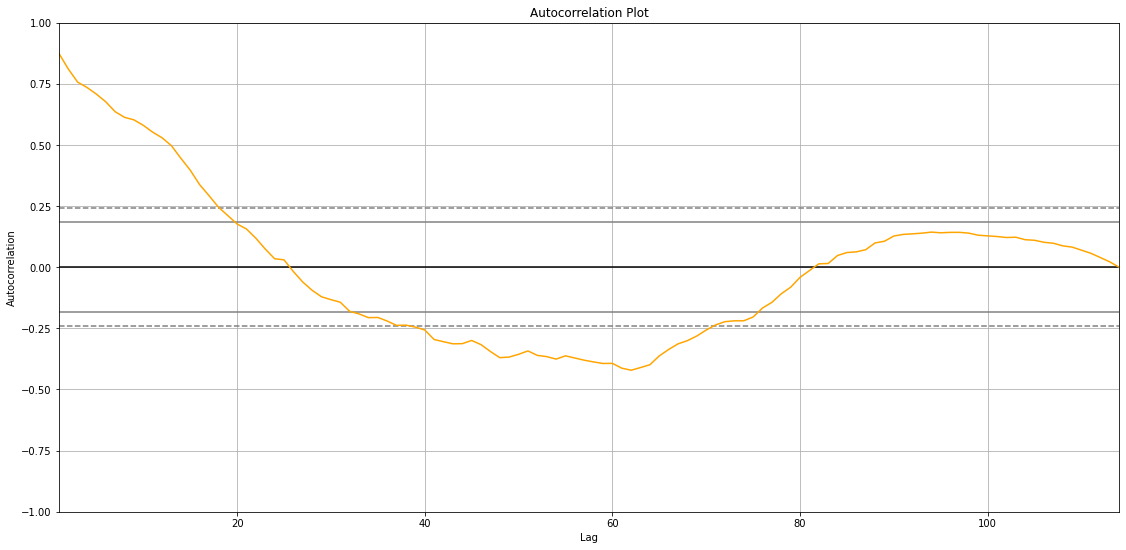

In [25]:
series = periodFifth
plt.figure(figsize=(19,9))
pandas.plotting.autocorrelation_plot(series, c="orange")
plt.title("Autocorrelation Plot")
plt.show()

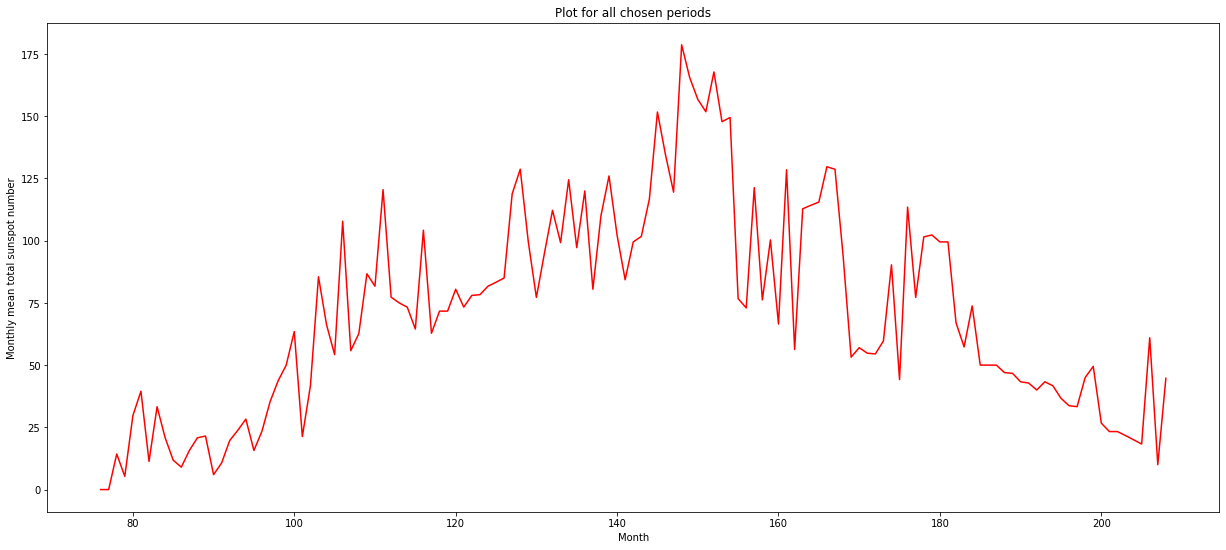

In [26]:
plt.figure(figsize=(21,9))
plt.ylabel("Monthly mean total sunspot number")
plt.xlabel("Month")
plt.title("Plot for all chosen periods")
plt.plot(periodFirst, c="red")

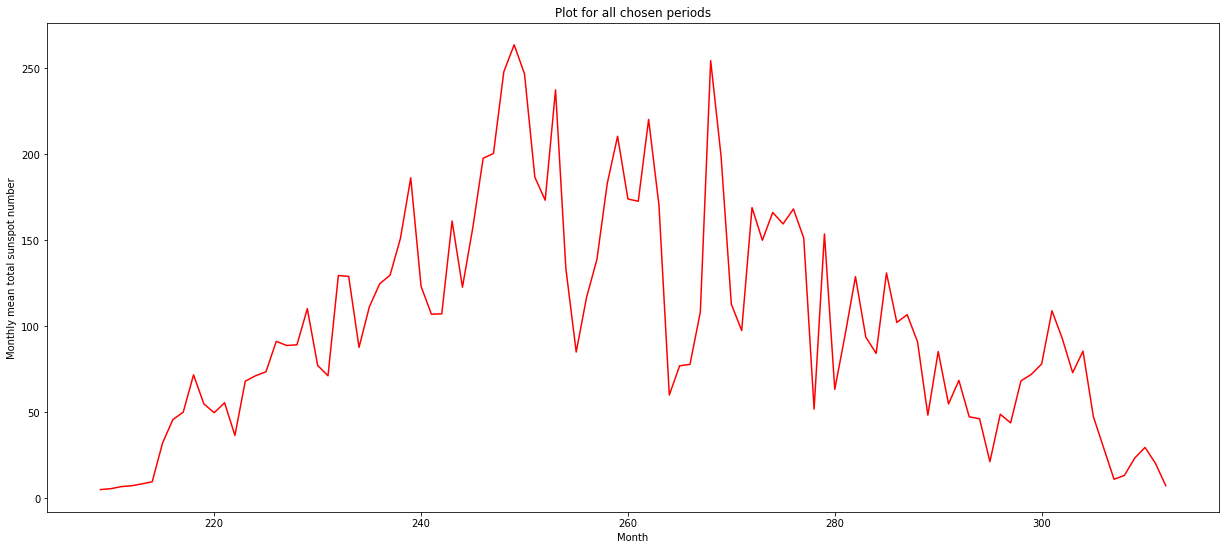

In [27]:
plt.figure(figsize=(21,9))
plt.ylabel("Monthly mean total sunspot number")
plt.xlabel("Month")
plt.title("Plot for all chosen periods")
plt.plot(periodSecond, c="red")

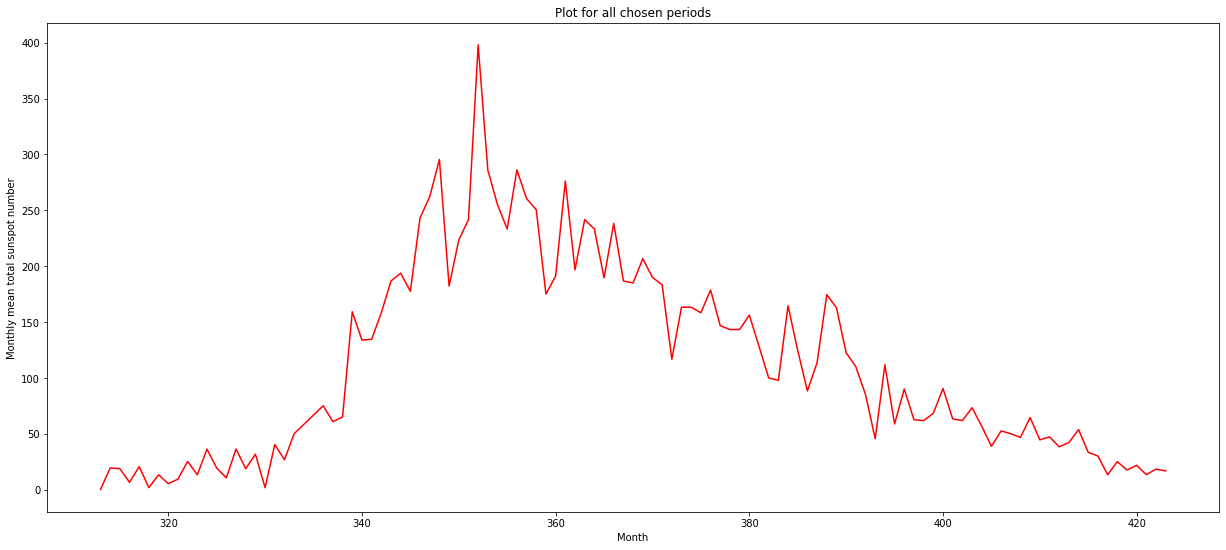

In [28]:
plt.figure(figsize=(21,9))
plt.ylabel("Monthly mean total sunspot number")
plt.xlabel("Month")
plt.title("Plot for all chosen periods")
plt.plot(periodThird, c="red")

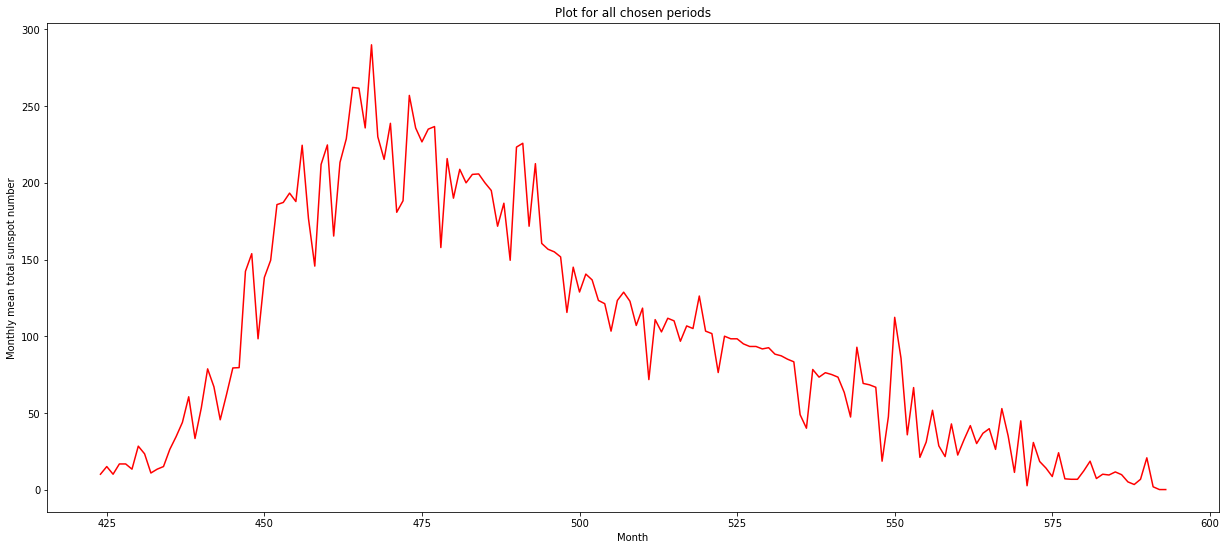

In [29]:
plt.figure(figsize=(21,9))
plt.ylabel("Monthly mean total sunspot number")
plt.xlabel("Month")
plt.title("Plot for all chosen periods")
plt.plot(periodFourth, c="red")

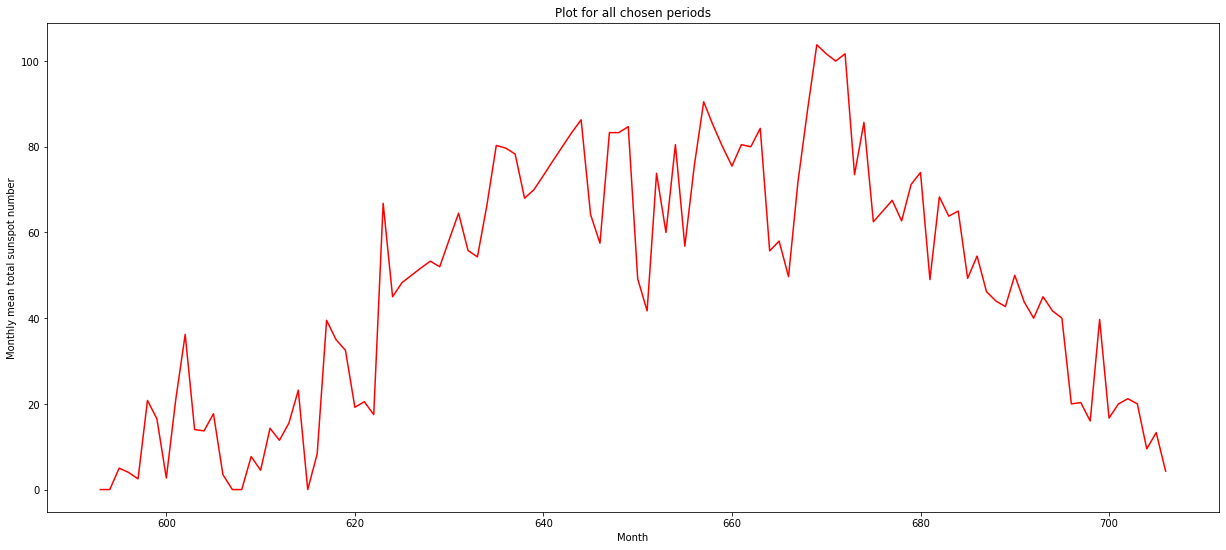

In [30]:
plt.figure(figsize=(21,9))
plt.ylabel("Monthly mean total sunspot number")
plt.xlabel("Month")
plt.title("Plot for all chosen periods")
plt.plot(periodFifth, c="red")